Author: Alkistis Pourtsidou, ICG Portsmouth

Using part of http://camb.readthedocs.io/en/latest/CAMBdemo.html 

To run this Jupyter notebook you need to have CAMB and the CAMB python package 
installed. In order to install the CAMB python package on your computer follow
the instructions in http://camb.readthedocs.io/en/latest/

In [1]:
%matplotlib inline
import sys, platform, os

from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model, initialpower

In [2]:
import scipy
from scipy.interpolate import interp1d
from __future__ import division

In [3]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='x-large'
plt.rc('font', **font)
plt.rcParams['legend.fontsize']='medium'

In [4]:
from scipy import integrate
from scipy import linalg

pi=np.pi

In [5]:
#Fiducial cosmological parameters

c=3e5
hubble=0.675
omegab=0.022*pow(hubble,-2)
omegac=0.119*pow(hubble,-2)
om0=omegac+omegab
H00=100*hubble
Ass=2.14e-9
tauf=0.06

nss = 0.9655
alphass = 0.0 #spectral running
betass = 0.0 #second running

gamma=0.545

kpivot = 0.05 

In [6]:
#Set up the fiducial cosmology
pars = camb.CAMBparams()
#Set cosmology
pars.set_cosmology(H0=H00,ombh2=omegab*pow(hubble,2), omch2=omegac*pow(hubble,2),omk=0,mnu=0,tau=tauf)
pars.set_dark_energy() #LCDM (default)
pars.InitPower.set_params(ns=nss, r=0, As=Ass, nrun=alphass, nrunrun=betass, pivot_scalar=kpivot)
pars.set_for_lmax(5000, lens_potential_accuracy=0);

In [7]:
#calculate results for these parameters
results = camb.get_results(pars)
#print pars

In [8]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars)
for name in powers: print name

total
lens_potential
lensed_scalar
unlensed_scalar
unlensed_total
tensor


In [9]:
CMB_outputscale = 7.4311e12 #μK^2

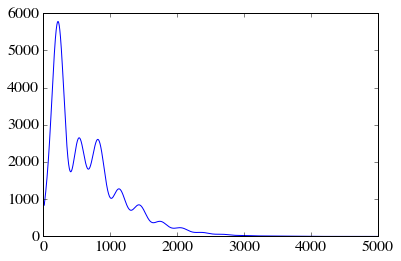

In [10]:
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).

CL=powers['unlensed_scalar']

ls = np.arange(CL.shape[0])
plt.plot(ls,CMB_outputscale*CL[:,0], color='b') #in μΚ^2
plt.show()

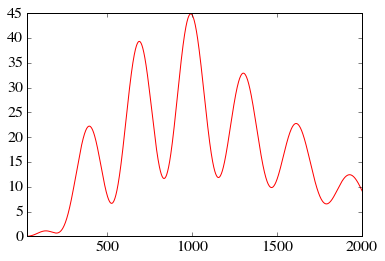

In [11]:
plt.plot(ls,CMB_outputscale*CL[:,1], color='r') #in μΚ^2
plt.xlim(30,2000)
plt.show()

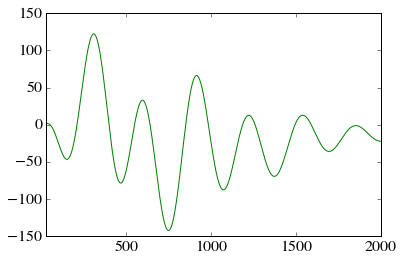

In [12]:
plt.plot(ls,CMB_outputscale*CL[:,3], color='g') #in μΚ^2
plt.xlim(30,2000)
plt.ylim(-150,150)
plt.show()

In [13]:
#Brute force calculations of the derivatives
#Plan to code this better using dictionary functions

In [14]:
# Numerical derivative wrt ns 

step_ns = 0.005
ns_p = nss+step_ns
ns_m = nss-step_ns

#DERIV PLUS
pars = camb.CAMBparams()
pars.set_cosmology(H0=H00, ombh2=omegab*pow(hubble,2), omch2=omegac*pow(hubble,2),omk=0,mnu=0,tau=tauf)
pars.set_dark_energy() #LCDM (default)
pars.InitPower.set_params(ns=ns_p, r=0, As=Ass, nrun=alphass, nrunrun=betass)
pars.set_for_lmax(5000, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars)
CL_ns_p=powers['unlensed_scalar']

#DERIV MINUS
pars = camb.CAMBparams()
pars.set_cosmology(H0=H00, ombh2=omegab*pow(hubble,2), omch2=omegac*pow(hubble,2),omk=0,mnu=0,tau=tauf)
pars.set_dark_energy() #LCDM (default)
pars.InitPower.set_params(ns=ns_m, r=0, As=Ass, nrun=alphass, nrunrun=betass)
pars.set_for_lmax(5000, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars)
CL_ns_m=powers['unlensed_scalar']

# Numerical derivative wrt alphas 

step_alphas = 0.00005
alphas_p = alphass+step_alphas
alphas_m = alphass-step_alphas

#DERIV PLUS
pars = camb.CAMBparams()
pars.set_cosmology(H0=H00, ombh2=omegab*pow(hubble,2), omch2=omegac*pow(hubble,2),omk=0,mnu=0,tau=tauf)
pars.set_dark_energy() #LCDM (default)
pars.InitPower.set_params(ns=nss, r=0, As=Ass, nrun=alphas_p, nrunrun=betass)
pars.set_for_lmax(5000, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars)
CL_alphas_p=powers['unlensed_scalar']

#DERIV MINUS
pars = camb.CAMBparams()
pars.set_cosmology(H0=H00, ombh2=omegab*pow(hubble,2), omch2=omegac*pow(hubble,2),omk=0,mnu=0,tau=tauf)
pars.set_dark_energy() #LCDM (default)
pars.InitPower.set_params(ns=nss, r=0, As=Ass, nrun=alphas_m, nrunrun=betass)
pars.set_for_lmax(5000, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars)
CL_alphas_m=powers['unlensed_scalar']

# Numerical derivative wrt betas 

step_betas = 0.00005
betas_p = betass+step_betas
betas_m = betass-step_betas

#DERIV PLUS
pars = camb.CAMBparams()
pars.set_cosmology(H0=H00, ombh2=omegab*pow(hubble,2), omch2=omegac*pow(hubble,2),omk=0,mnu=0,tau=tauf)
pars.set_dark_energy() #LCDM (default)
pars.InitPower.set_params(ns=nss, r=0, As=Ass, nrun=alphass, nrunrun=betas_p)
pars.set_for_lmax(5000, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars)
CL_betas_p=powers['unlensed_scalar']

#DERIV MINUS
pars = camb.CAMBparams()
pars.set_cosmology(H0=H00, ombh2=omegab*pow(hubble,2), omch2=omegac*pow(hubble,2),omk=0,mnu=0,tau=tauf)
pars.set_dark_energy() #LCDM (default)
pars.InitPower.set_params(ns=nss, r=0, As=Ass, nrun=alphass, nrunrun=betas_m)
pars.set_for_lmax(5000, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars)
CL_betas_m=powers['unlensed_scalar']

In [15]:
# Numerical derivative wrt wb 

wb = omegab*pow(hubble,2)
step_wb = 0.01*wb/2
wb_p = wb+step_wb
wb_m = wb-step_wb

#DERIV PLUS
pars = camb.CAMBparams()
pars.set_cosmology(H0=H00, ombh2=wb_p, omch2=omegac*pow(hubble,2),omk=0,mnu=0,tau=tauf)
pars.set_dark_energy() #LCDM (default)
pars.InitPower.set_params(ns=nss, r=0, As=Ass, nrun=alphass, nrunrun=betass)
pars.set_for_lmax(5000, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars)
CL_wb_p=powers['unlensed_scalar']

#DERIV MINUS
pars = camb.CAMBparams()
pars.set_cosmology(H0=H00, ombh2=wb_m, omch2=omegac*pow(hubble,2),omk=0,mnu=0,tau=tauf)
pars.set_dark_energy() #LCDM (default)
pars.InitPower.set_params(ns=nss, r=0, As=Ass, nrun=alphass, nrunrun=betass)
pars.set_for_lmax(5000, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars)
CL_wb_m=powers['unlensed_scalar']

In [16]:
# Numerical derivative wrt As 

step_As = 0.01*Ass/2
As_p = Ass+step_As
As_m = Ass-step_As

#DERIV PLUS
pars = camb.CAMBparams()
pars.set_cosmology(H0=H00, ombh2=omegab*pow(hubble,2), omch2=omegac*pow(hubble,2),omk=0,mnu=0,tau=tauf)
pars.set_dark_energy() #LCDM (default)
pars.InitPower.set_params(ns=nss, r=0, As=As_p, nrun=alphass, nrunrun=betass)
pars.set_for_lmax(5000, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars)
CL_As_p=powers['unlensed_scalar']

#DERIV MINUS
pars = camb.CAMBparams()
pars.set_cosmology(H0=H00, ombh2=omegab*pow(hubble,2), omch2=omegac*pow(hubble,2),omk=0,mnu=0,tau=tauf)
pars.set_dark_energy() #LCDM (default)
pars.InitPower.set_params(ns=nss, r=0, As=As_m, nrun=alphass, nrunrun=betass)
pars.set_for_lmax(5000, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars)
CL_As_m=powers['unlensed_scalar']

In [17]:
# Numerical derivative wrt wc 

wc = omegac*pow(hubble,2)
step_wc = 0.01*wc/2
wc_p = wc+step_wc
wc_m = wc-step_wc

#DERIV PLUS
pars = camb.CAMBparams()
pars.set_cosmology(H0=H00, ombh2=omegab*pow(hubble,2), omch2=wc_p,omk=0,mnu=0,tau=tauf)
pars.set_dark_energy() #LCDM (default)
pars.InitPower.set_params(ns=nss, r=0, As=Ass, nrun=alphass, nrunrun=betass)
pars.set_for_lmax(5000, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars)
CL_wc_p=powers['unlensed_scalar']

#DERIV MINUS
pars = camb.CAMBparams()
pars.set_cosmology(H0=H00, ombh2=omegab*pow(hubble,2), omch2=wc_m,omk=0,mnu=0,tau=tauf)
pars.set_dark_energy() #LCDM (default)
pars.InitPower.set_params(ns=nss, r=0, As=Ass, nrun=alphass, nrunrun=betass)
pars.set_for_lmax(5000, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars)
CL_wc_m=powers['unlensed_scalar']

In [18]:
# Numerical derivative wrt tau

step_tau = 0.01*tauf/2
tau_p = tauf+step_tau
tau_m = tauf-step_tau

#DERIV PLUS
pars = camb.CAMBparams()
pars.set_cosmology(H0=H00, ombh2=omegab*pow(hubble,2), omch2=omegac*pow(hubble,2),omk=0,mnu=0,tau=tau_p)
pars.set_dark_energy() #LCDM (default)
pars.InitPower.set_params(ns=nss, r=0, As=Ass, nrun=alphass, nrunrun=betass)
pars.set_for_lmax(5000, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars)
CL_tau_p=powers['unlensed_scalar']

#DERIV MINUS
pars = camb.CAMBparams()
pars.set_cosmology(H0=H00, ombh2=omegab*pow(hubble,2), omch2=omegac*pow(hubble,2),omk=0,mnu=0,tau=tau_m)
pars.set_dark_energy() #LCDM (default)
pars.InitPower.set_params(ns=nss, r=0, As=Ass, nrun=alphass, nrunrun=betass)
pars.set_for_lmax(5000, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars)
CL_tau_m=powers['unlensed_scalar']

In [19]:
# Numerical derivative wrt H0

step_H0 = 0.01*H00/2
H0_p = H00+step_H0
H0_m = H00-step_H0

#DERIV PLUS
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0_p, ombh2=omegab*pow(hubble,2), omch2=omegac*pow(hubble,2),omk=0,mnu=0,tau=tauf)
pars.set_dark_energy() #LCDM (default)
pars.InitPower.set_params(ns=nss, r=0, As=Ass, nrun=alphass, nrunrun=betass)
pars.set_for_lmax(5000, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars)
CL_H0_p=powers['unlensed_scalar']

#DERIV MINUS
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0_m, ombh2=omegab*pow(hubble,2), omch2=omegac*pow(hubble,2),omk=0,mnu=0,tau=tauf)
pars.set_dark_energy() #LCDM (default)
pars.InitPower.set_params(ns=nss, r=0, As=Ass, nrun=alphass, nrunrun=betass)
pars.set_for_lmax(5000, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars)
CL_H0_m=powers['unlensed_scalar']

In [20]:
#noise properties: CoRE-like CMB survey

fsky = 0.7
DT = (5.0/60)*pi/180 #μΚ
thetaFHWM = (4.0/60)*pi/180
sigmab = thetaFHWM/np.sqrt(8*np.log(2))

In [21]:
#Fisher Matrix
#parameters: [ns,As,wc,wb,tau,H0,alphas,betas]

Npar = 8 
Fishermat = np.zeros([Npar,Npar])

for li in ls[10:]: #start from ell=10
    NellTT = (li*(li+1)/(2*pi))*pow(DT,2)*np.exp(li*(li+1)*pow(sigmab,2))/CMB_outputscale
    NellEE = 2*NellTT 
    for i in range(0,Npar):
        if i==0:  
            derivTT_i = (CL_ns_p[li,0]-CL_ns_m[li,0])/(2*step_ns)
            derivTE_i = (CL_ns_p[li,3]-CL_ns_m[li,3])/(2*step_ns)
            derivEE_i = (CL_ns_p[li,1]-CL_ns_m[li,1])/(2*step_ns)
        elif i==1:  
            derivTT_i = (CL_As_p[li,0]-CL_As_m[li,0])/(2*step_As)
            derivTE_i = (CL_As_p[li,3]-CL_As_m[li,3])/(2*step_As)
            derivEE_i = (CL_As_p[li,1]-CL_As_m[li,1])/(2*step_As)
        elif i==2:  
            derivTT_i = (CL_wc_p[li,0]-CL_wc_m[li,0])/(2*step_wc)
            derivTE_i = (CL_wc_p[li,3]-CL_wc_m[li,3])/(2*step_wc)
            derivEE_i = (CL_wc_p[li,1]-CL_wc_m[li,1])/(2*step_wc)
        elif i==3:  
            derivTT_i = (CL_wb_p[li,0]-CL_wb_m[li,0])/(2*step_wb)
            derivTE_i = (CL_wb_p[li,3]-CL_wb_m[li,3])/(2*step_wb)
            derivEE_i = (CL_wb_p[li,1]-CL_wb_m[li,1])/(2*step_wb)
        elif i==4:  
            derivTT_i = (CL_tau_p[li,0]-CL_tau_m[li,0])/(2*step_tau)
            derivTE_i = (CL_tau_p[li,3]-CL_tau_m[li,3])/(2*step_tau)
            derivEE_i = (CL_tau_p[li,1]-CL_tau_m[li,1])/(2*step_tau)
        elif i==5:  
            derivTT_i = (CL_H0_p[li,0]-CL_H0_m[li,0])/(2*step_H0)
            derivTE_i = (CL_H0_p[li,3]-CL_H0_m[li,3])/(2*step_H0)
            derivEE_i = (CL_H0_p[li,1]-CL_H0_m[li,1])/(2*step_H0)
        elif i==6:  
            derivTT_i = (CL_alphas_p[li,0]-CL_alphas_m[li,0])/(2*step_alphas)
            derivTE_i = (CL_alphas_p[li,3]-CL_alphas_m[li,3])/(2*step_alphas)
            derivEE_i = (CL_alphas_p[li,1]-CL_alphas_m[li,1])/(2*step_alphas)
        elif i==7:  
            derivTT_i = (CL_betas_p[li,0]-CL_betas_m[li,0])/(2*step_betas)
            derivTE_i = (CL_betas_p[li,3]-CL_betas_m[li,3])/(2*step_betas)
            derivEE_i = (CL_betas_p[li,1]-CL_betas_m[li,1])/(2*step_betas)
        else: print "Error: index out of range"
            
        for j in range(0,Npar):
            if j>=i:
                if j==0:  
                    derivTT_j = (CL_ns_p[li,0]-CL_ns_m[li,0])/(2*step_ns)
                    derivTE_j = (CL_ns_p[li,3]-CL_ns_m[li,3])/(2*step_ns)
                    derivEE_j = (CL_ns_p[li,1]-CL_ns_m[li,1])/(2*step_ns)
                elif j==1:  
                    derivTT_j = (CL_As_p[li,0]-CL_As_m[li,0])/(2*step_As)
                    derivTE_j = (CL_As_p[li,3]-CL_As_m[li,3])/(2*step_As)
                    derivEE_j = (CL_As_p[li,1]-CL_As_m[li,1])/(2*step_As)
                elif j==2:  
                    derivTT_j = (CL_wc_p[li,0]-CL_wc_m[li,0])/(2*step_wc)
                    derivTE_j = (CL_wc_p[li,3]-CL_wc_m[li,3])/(2*step_wc)
                    derivEE_j = (CL_wc_p[li,1]-CL_wc_m[li,1])/(2*step_wc)
                elif j==3:  
                    derivTT_j = (CL_wb_p[li,0]-CL_wb_m[li,0])/(2*step_wb)
                    derivTE_j = (CL_wb_p[li,3]-CL_wb_m[li,3])/(2*step_wb)
                    derivEE_j = (CL_wb_p[li,1]-CL_wb_m[li,1])/(2*step_wb)
                elif j==4:  
                    derivTT_j = (CL_tau_p[li,0]-CL_tau_m[li,0])/(2*step_tau)
                    derivTE_j = (CL_tau_p[li,3]-CL_tau_m[li,3])/(2*step_tau)
                    derivEE_j = (CL_tau_p[li,1]-CL_tau_m[li,1])/(2*step_tau)
                elif j==5:  
                    derivTT_j = (CL_H0_p[li,0]-CL_H0_m[li,0])/(2*step_H0)
                    derivTE_j = (CL_H0_p[li,3]-CL_H0_m[li,3])/(2*step_H0)
                    derivEE_j = (CL_H0_p[li,1]-CL_H0_m[li,1])/(2*step_H0)
                elif j==6:  
                    derivTT_j = (CL_alphas_p[li,0]-CL_alphas_m[li,0])/(2*step_alphas)
                    derivTE_j = (CL_alphas_p[li,3]-CL_alphas_m[li,3])/(2*step_alphas)
                    derivEE_j = (CL_alphas_p[li,1]-CL_alphas_m[li,1])/(2*step_alphas)
                elif j==7:  
                    derivTT_j = (CL_betas_p[li,0]-CL_betas_m[li,0])/(2*step_betas)
                    derivTE_j = (CL_betas_p[li,3]-CL_betas_m[li,3])/(2*step_betas)
                    derivEE_j = (CL_betas_p[li,1]-CL_betas_m[li,1])/(2*step_betas)
                else: print "Error: index out of range"
                
                CTTtot = CL[li,0]+NellTT
                CTE = CL[li,3]
                CEEtot = CL[li,1]+NellEE     
                
                Trace = (pow(CTTtot,2)*derivEE_i*derivEE_j - 2*CTTtot*(CTE*derivEE_j*derivTE_i 
                + CTE*derivEE_i*derivTE_j - CEEtot*derivTE_i*derivTE_j) 
                + pow(CEEtot,2)*derivTT_i*derivTT_j 
                + pow(CTE,2)*(2*derivTE_i*derivTE_j + derivEE_j*derivTT_i + derivEE_i*derivTT_j) 
                - 2*CEEtot*CTE*(derivTE_j*derivTT_i + derivTE_i*derivTT_j))/pow(pow(CTE,2) - CEEtot*CTTtot,2)                                          
                
                Fishermat[i][j]+=(1/2.)*(2*ls[li]+1)*fsky*Trace
            else: Fishermat[i,j] = Fishermat[j,i]

In [22]:
#np.savetxt('FM_CORE_betas.txt', Fishermat)

In [23]:
Covmat = linalg.inv(Fishermat)

In [24]:
#print Fishermat

In [25]:
#print marginalised uncertainties [ns,As,wc,wb,tau,H0,alphas,betas]
for i in range(0,Npar):
    print np.sqrt(linalg.inv(Fishermat)[i,i])

0.00298324552048
1.48054377058e-11
0.000732270685074
4.70385732731e-05
0.00319082458117
0.290627480614
0.00255460696896
0.00575334217207


In [26]:
#correlation coefficients for betas
for ri in range(0,Npar):
    print Covmat[7,ri]/np.sqrt(Covmat[7][7]*Covmat[ri][ri])

-0.759390567824
0.416850810605
0.454631996329
-0.267541412772
0.230928921133
-0.462875590147
-0.154020436585
1.0
